This notebook added testing prediction results

In [1]:
# !pip install flair

# Train a model using own data and flair embedding

In [2]:
import os
import sys
from typing import List
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, StackedEmbeddings, FlairEmbeddings, BytePairEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from flair.visual.training_curves import Plotter
from seqeval.metrics import classification_report as classification_report_entity

I0208 13:13:26.811664 4302675392 file_utils.py:39] PyTorch version 1.6.0 available.
I0208 13:13:30.224641 4302675392 textcleaner.py:37] 'pattern' package not found; tag filters are not available for English


In [3]:
sys.path.append('../shared_functions')
from preprocess import read_file

In [4]:
# 1. get the corpus

# define columns
columns = {0: 'text', 1: 'ner'}

# this is the folder in which train, test and dev files reside
data_folder = '../data_raw'

# init a corpus using column format, data folder and the names of the train, dev and test files
corpus: Corpus = ColumnCorpus(data_folder, columns,
                              train_file='data_iob_0911_train.txt')

print(corpus)
print(corpus.train[0].to_tagged_string('ner'))

# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary.idx2item)

# 4. initialize embeddings
embedding_types: List[TokenEmbeddings] = [

#     WordEmbeddings('glove'),
#     byte pair embeddings segment words into subsequences. 
#     This can dramatically reduce the model size vis-a-vis using normal word embeddings at nearly the same accuracy
    BytePairEmbeddings('en'),
    # comment in this line to use character embeddings
    # CharacterEmbeddings(),

#     # contextual string embeddings, forward
#     PooledFlairEmbeddings('news-forward', pooling='min'),

#     # contextual string embeddings, backward
#     PooledFlairEmbeddings('news-backward', pooling='min'),
    
    # comment in these lines to use flair embeddings
    #'news-X'	      English	Trained with 1 billion word corpus
    #'news-X-fast'	English	Trained with 1 billion word corpus, CPU-friendly
    #'mix-X'	      English	Trained with mixed corpus (Web, Wikipedia, Subtitles)
    FlairEmbeddings('news-forward')
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger, not sure about use_crf
tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

# 6. initialize trainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)

# 7. start training
trainer.train('flair_model', # creates a folder called flair_model and store results inside
#               learning_rate=0.01,
              mini_batch_size=64,
              max_epochs=5)

2021-02-08 13:13:30,478 Reading data from ../data_raw
2021-02-08 13:13:30,479 Train: ../data_raw/data_iob_0911_train.txt
2021-02-08 13:13:30,480 Dev: None
2021-02-08 13:13:30,480 Test: None


I0208 13:13:31.865997 4302675392 utils_any2vec.py:341] loading projection weights from /Users/i504346/.flair/embeddings/en/en.wiki.bpe.vs100000.d50.w2v.bin


Corpus: 8630 train + 959 dev + 1065 test sentences
limit to topvar <B-CUSTOMERNAME> ' s activities
[b'<unk>', b'O', b'B-CUSTOMERNAME', b'B-PERSON', b'I-PERSON', b'I-CUSTOMERNAME', b'B-DATE', b'I-DATE', b'B-LOCATION', b'I-LOCATION', b'in', b'<START>', b'<STOP>']


/Users/i504346/miniconda3/envs/py36/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
I0208 13:13:33.842172 4302675392 utils_any2vec.py:405] loaded (100000, 50) matrix from /Users/i504346/.flair/embeddings/en/en.wiki.bpe.vs100000.d50.w2v.bin


2021-02-08 13:13:34,109 ----------------------------------------------------------------------------------------------------
2021-02-08 13:13:34,110 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): BytePairEmbeddings(model=0-bpe-en-100000-50)
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=2148, out_features=2148, bias=True)
  (rnn): LSTM(2148, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=13, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2021-02-08 13:13:34,111 --------------------------------------------------------------------------------------

2021-02-08 13:33:19,325 epoch 5 - iter 26/135 - loss 0.69805469 - samples/sec: 60.57 - lr: 0.100000
2021-02-08 13:33:37,372 epoch 5 - iter 39/135 - loss 0.68615035 - samples/sec: 46.15 - lr: 0.100000
2021-02-08 13:34:12,129 epoch 5 - iter 52/135 - loss 0.70341076 - samples/sec: 23.96 - lr: 0.100000
2021-02-08 13:34:42,610 epoch 5 - iter 65/135 - loss 0.68574158 - samples/sec: 27.34 - lr: 0.100000
2021-02-08 13:34:56,255 epoch 5 - iter 78/135 - loss 0.69180555 - samples/sec: 61.03 - lr: 0.100000
2021-02-08 13:35:09,662 epoch 5 - iter 91/135 - loss 0.68494606 - samples/sec: 62.13 - lr: 0.100000
2021-02-08 13:35:22,536 epoch 5 - iter 104/135 - loss 0.68167256 - samples/sec: 64.97 - lr: 0.100000
2021-02-08 13:35:35,069 epoch 5 - iter 117/135 - loss 0.68536689 - samples/sec: 66.47 - lr: 0.100000
2021-02-08 13:35:48,428 epoch 5 - iter 130/135 - loss 0.68533395 - samples/sec: 62.32 - lr: 0.100000
2021-02-08 13:35:53,078 -------------------------------------------------------------------------

{'test_score': 0.9538171536286522,
 'dev_score_history': [0.8863013698630138,
  0.9263370332996974,
  0.9431932773109244,
  0.9456740442655934,
  0.9572534500168293],
 'train_loss_history': [4.589550680584377,
  1.3783126332141735,
  1.0175623862831682,
  0.8149992461557741,
  0.6869200061868739],
 'dev_loss_history': [1.193814754486084,
  0.5982339978218079,
  0.46091848611831665,
  0.38777604699134827,
  0.3299853503704071]}

In [6]:
loc = 'flair_model'

2021-02-08 13:52:58,566 ----------------------------------------------------------------------------------------------------
2021-02-08 13:52:58,567 WARNING: No LOSS found for test split in this data.
2021-02-08 13:52:58,568 Are you sure you want to plot LOSS and not another value?
2021-02-08 13:52:58,568 ----------------------------------------------------------------------------------------------------
2021-02-08 13:52:58,590 ----------------------------------------------------------------------------------------------------
2021-02-08 13:52:58,591 WARNING: No F1 found for test split in this data.
2021-02-08 13:52:58,592 Are you sure you want to plot F1 and not another value?
2021-02-08 13:52:58,592 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in flair_model/training.png


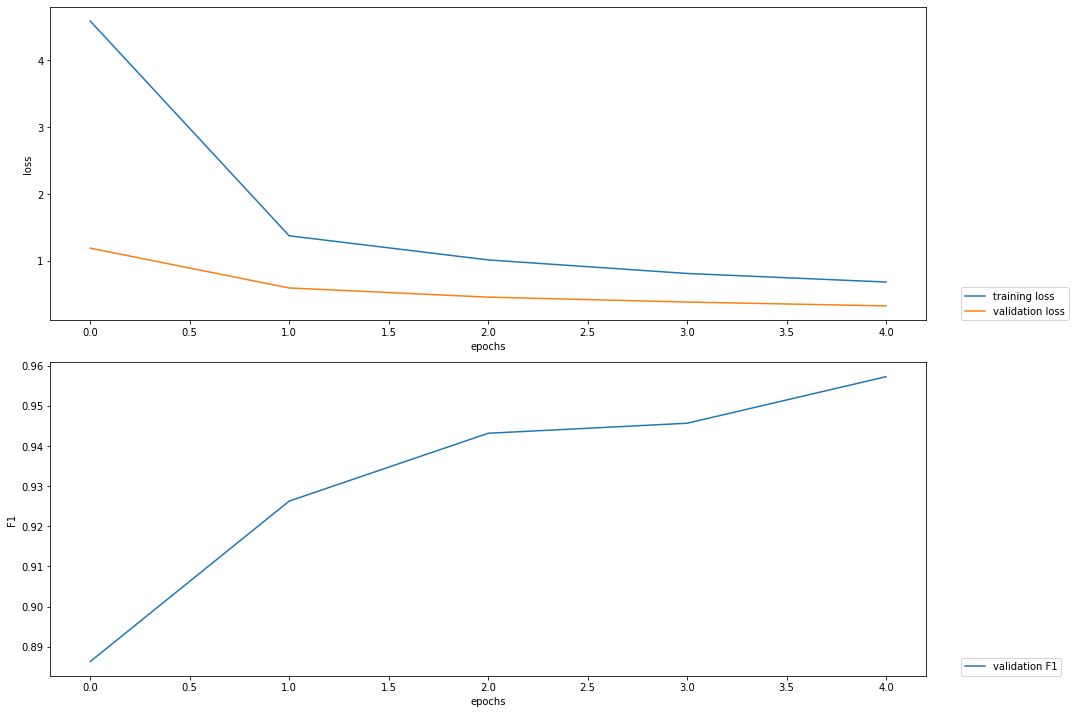

In [7]:
# 8. plot training curves (optional)
plotter = Plotter()
plotter.plot_training_curves(os.path.join(loc, 'loss.tsv'))

# Load trained model

In [8]:
from flair.data import Sentence
from flair.models import SequenceTagger

# load the model you trained
model = SequenceTagger.load(os.path.join(loc, 'best-model.pt'))

2021-02-08 13:53:03,650 loading file flair_model/best-model.pt


# Prediction

In [9]:
# sentence = Sentence("Get my deals with September & Co. between Jan. 4th and Jan. 11th.", use_tokenizer=True)
sentence = Sentence("show me my deals with BMW in Netherlands.", use_tokenizer=True)
model.predict(sentence)
print(sentence.to_tagged_string())
sentence.to_dict(tag_type='ner')

show me my deals with BMW <B-CUSTOMERNAME> in Netherlands <B-LOCATION> .


{'text': 'show me my deals with BMW in Netherlands.',
 'labels': [],
 'entities': [{'text': 'BMW',
   'start_pos': 22,
   'end_pos': 25,
   'labels': [CUSTOMERNAME (0.9995)]},
  {'text': 'Netherlands',
   'start_pos': 29,
   'end_pos': 40,
   'labels': [LOCATION (0.9486)]}]}

In [10]:
for i in range(len(sentence)):
    print(sentence[i].get_tag('ner'))

O (0.9997)
O (0.9993)
O (0.9988)
O (0.9991)
O (0.9993)
B-CUSTOMERNAME (0.9995)
O (0.9902)
B-LOCATION (0.9486)
O (0.9923)


In [11]:
sentences_id = ['open my account ID 6293',
                "open my account ID 62093",
                "open my account id 876293",
                "open my account 876293",
                'Find customer with account ID 60293',
                "Find customer with account id 60293",
                "Find customer with account ID 6880293"]

sentences_id = [Sentence(sent, use_tokenizer=True) for sent in sentences_id]
%time model.predict(sentences_id)
for result in sentences_id:
    print(result.to_tagged_string())

CPU times: user 1.06 s, sys: 22.8 ms, total: 1.08 s
Wall time: 277 ms
open my account ID 6293 <B-DATE>
open my account ID 62093
open my account id 876293
open my account 876293 <B-DATE>
Find customer with account ID 60293
Find customer with account id 60293
Find customer with account ID 6880293


## batch prediction

In [12]:
sentences = ['How many opportunities does Torsten Albert have in the next quarter for the basf account which are in phase d and upside',
'deals over 1 million euro',
'tell me if you can find any deals for me',
'find only committed deals for on premise products',
'tell my deals with status New and won',
'show only deals over 1 Million Euro',
'please get me volkswagen details',
'show deals with origin active renewal',
'do you have any idea about deals from account 15998',
'What accounts do I have in germany',
'germany account details',
"can i see Martin Springer's all activities",
'find deals having revenue range greater than 100k euros',
"please tell me martin springer's probable deals",
"can you tell me martin springer's probable deals",
'are there any opportunities worth more than a million in the next quarter',
'show deals with status discontinued and status booked',
'display deals with status booked',
'get my deals for phase a and phase b',
'do I have accounts in Belgium',
'find any daimler account in Belgium',
'open the list of all accounts at Netherland',
'in this year how many activities do i have',
'do i have any contacts available at volkswagen',
'i want to see the details of Caterpillar account',
'tell me if i can see my deals for next year',
'how many activities can you list me for this week',
'i want to know about all the contacts i have at volkswagen ag',
'i would like to see the activities Martin Springer owns',
'view contacts in HR department at Nike Inc',
'what accounts exist in India',
'do we have account axel springer in germany',
'which accounts do we have in serbia',
'I need somebody from HR department at SAP SE',
'i need a list of AO for volkswagen ag',
'would you please get me all my committed deals for the next quarter',
"list martin springer's next quarter opportunities that are not large",
'show only activities for my nike inc',
'display my previous month activities',
'display AEs at Transalta Corporation',
'filter deal 300061767',
'Filter the deals for Nike Inc',
'filter last month activities',
'filter Krupp Hoesch',
'only belgium account',
'Find contact Amandeep Hundal',
"Show me Martin Springer's role on Volkswagen",
'show my deals',
'get my deals for Volkswagen',
'get deals for the previous quarter',
'get deals for CQ+1',
'open my deal with the id 300054334',
'find probable cloud deals over 1 million in the next quarter',
'find my committed cloud deals',
'show all my service deals',
'find only committed deals',
'display select deals',
"find vishal srivastava's deals",
'what are my in process deals',
'show deals I own',
'What deals do I own',
'do I have deals that are less than 250 K',
'How many deals do I have that are less than 250 K',
'get my B negotiate deals',
'get deals for account 159978',
'find this year deals',
'How many large deals do I have',
'How many deals do I have that are big',
'show me my large deals',
"find last year's opportunities",
'find last year deals',
'my deals over 900k',
'find only deals with a revenue  over 100k',
'find gokul ramdass next quarter opportunities',
'list my probable opportunities in the next year',
'list my opportunities that are probable',
'please present my current quarter deals',
'I would like to view my opportunities for the current quarter',
"list anuragini's last year opportunities that are won",
"list martin springer's next quarter opportunities that are large",
'show only those probable deals less than 500k',
'How many deals do I have that are over 250 thousand',
'find deals with a value more than 100k',
'How many deals did I have in the last year less than 1 Million',
'How many deals do I have less than 1 Million',
"find phase b deals which are probable and are ankit chaurasia's deals",
"find martin springer's phase d and status new and phase a deals",
"find martin springer's phase d deals",
'display deals with status discontinued and status booked',
'show only probable and committed deals',
'which deals are excluded from pipeline',
'show excluded from pipeline and probable deals',
'How many opportunities over 100 k does Manish Gupta have in the first quarter for caterpillar which are in phase b and probable',
'look for my account caterpillar',
'display caterpillar account',
'open my accounts in Belgium',
'display account 167545',
'get my Nike Inc account in Denmark',
'what are my accounts in India',
'find coca cola account based in Canada',
'account id 30875',
'get 3m canada in germany',
'open Transalta Corporation',
'my accounts',
'open Caterpillar',
'my accounts in Netherlands ',
'find the account with the id 159978',
'show account 159978',
'list my accounts',
'find martin winterkorn at volkswagen ag',
'Who is Michael Simpson at Volkswagen',
'which are my contacts in the human resources department at nestle in Switzerland',
'get my contacts at nestle',
'what is the role of Dawn de Lima at Transalta corporation',
'whom do i know at account 30875',
'find my contacts in HR department at PepsiCo Inc',
'who is in the marketing department at Daimler Ag',
"do you know Anuragini's function at Daimler Ag",
"do you know Dieter Zetsche's function at Daimler Ag",
'Who is the Chief Technology Officer of Caterpillar',
"show ulrich springer's job for daimler",
'Who is the CSO of Robert Bosch',
'find my contacts at 167545 account',
'what are my contacts at 167545 account',
"tell Vishal Srivastava's department at Siemens",
'get an IT department contact at fiat in italy',
'get a sales department contact at ferrari in italy',
"what is carlos ghosn's role at Renault",
"tell Mark Zuckerberg's function at Facebook",
'tell me about Joe Kaeser at Siemens AG',
'in which department at Siemens is Joe Kaeser',
'Who do we know at volkswagen',
'Who do I know at Siemens AG in France',
'who do I know at siemens in Singapore',
'Find contacts in Canada under account 10557260',
'Find contacts in the marketing department for account 10557260  in Guadeloupe',
'Who is the chief digital officer of 32667 account',
'Show my contacts in the Marketing department of lmvh',
'who is Martin Springer',
'show me value engineer at Nike',
'get the Account Owner of Volkswagen',
"I'd like to see the Account Owner of Volkswagen",
'who is executive sponsor for pepsiCo inc',
'please find the Global Account Director for my account Bayerische Motorenwerke AG',
'who is Global Account Director at bmw ag',
'find Industry Account Exec for account 167545',
'give me the Industry Account Executive for the Apple Computers',
'give me the Account Owner for Volkswagen',
'Find Amandeep Hundal',
'who is a Value Engineer for the Springer AG',
'who is Value Engineer at Nike Inc',
"what is Ankit Chaurasia's role on account 30875",
'is there any account owner for PepsiCo Inc',
'Who is Anuragini',
'display all activities for BASF AG in this year',
"get volkswagen account's activities",
"Find Anuragini's activities",
'what are my activities for tomorrow',
'display my activities this month',
'which of my activities are in completed or open status',
'find my activities that are open and in process this week',
"find Martin springer's activities",
'show me my Nike Inc activities this week',
'list contact Ankit chaurasia activities this month',
'what are activities for Gokulraj Ramdass in the next month',
'find all the activities of Martin Springer in the last month',
'what are my Caterpillar activities last year',
'display my activities in in process and completed status',
'what are my activities',
'previous month activities',
"list Ramdass Gokul's activities",
'filter germany account',
'limit it to country germany',
'find customer with account id 30875',
'get my Forest Products, Furniture & Textiles account',
'get my Engineering, Construction and Operation in bmw account']

sentences_all = [Sentence(sent, use_tokenizer=True) for sent in sentences]


%time model.predict(sentences_all, mini_batch_size=32)

CPU times: user 12.1 s, sys: 477 ms, total: 12.6 s
Wall time: 3.2 s


# Evaluation

## Evaluate on all test dataset

In [14]:
# pred, true in the test.tsv

test_sentences = read_file(os.path.join(loc, 'test.tsv'), True)

pred_label = [[w[2] for w in s] for s in test_sentences]

true_label = [[w[1] for w in s] for s in test_sentences]
true_label_2 = [[l.replace("B-in", "O") for l in label] for label in true_label] 
pred_label_2 = [[l.replace("B-in", "O") for l in label] for label in pred_label] 

In [15]:

print(classification_report_entity(true_label_2, pred_label_2))

              precision    recall  f1-score   support

      PERSON       0.96      0.98      0.97       338
        DATE       0.95      0.97      0.96       240
    LOCATION       0.96      0.97      0.96       424
CUSTOMERNAME       0.94      0.93      0.94       586

 avg / total       0.95      0.96      0.95      1588

